<a href="https://colab.research.google.com/github/Shanthan0/Neural-Networks-and-Deep-Learning-Coursework/blob/main/ICP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv("/content/data.csv")
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


c.	Show the basic statistical description about the data.

In [8]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


d.	Check if the data has null values.

In [9]:
df.isnull().sum()

,0
Duration,0
Pulse,0
Maxpulse,0
Calories,5


i.	Replace the null values with the mean

In [10]:
df.fillna(df.mean(), inplace=True)

e.	Select at least two columns and aggregate the data using: min, max, count, mean.

In [12]:
sel_cols = ["Duration", "Pulse"]
df_sel = df[sel_cols].agg(['min', 'max', 'count', 'mean'])
df_sel

,Duration,Pulse
min,15.000000,80.000000
max,300.000000,159.000000
count,169.000000,169.000000
mean,63.846154,107.461538


f.	Filter the dataframe to select the rows with calories values between 500 and 1000.

In [13]:
df_cal = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
df_cal

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


g.	Filter the dataframe to select the rows with calories values > 500 and pulse < 100.

In [14]:
df_cal_pulse = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
df_cal_pulse

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


h.	Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.

In [15]:
df_modified = df.drop('Maxpulse', axis=1)
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


i.	Delete the “Maxpulse” column from the main df dataframe

In [16]:
df.drop('Maxpulse', axis=1, inplace=True)
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


j.	Convert the datatype of Calories column to int datatype.

In [17]:
df['Calories'] = df['Calories'].astype(int)
df.dtypes

,0
Duration,int64
Pulse,int64
Calories,int64


Using pandas create a scatter plot for the two columns (Duration and Calories).

<Axes: xlabel='Duration', ylabel='Calories'>

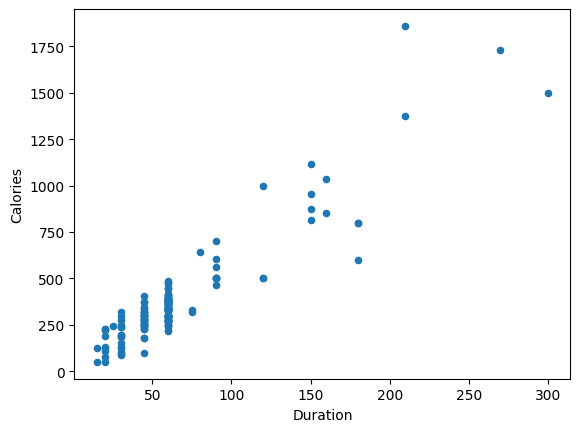

In [21]:
df.plot(kind='scatter', x='Duration', y='Calories')

# 2.	Linear Regression

a)	Import the given “Salary_Data.csv”

In [24]:
df_sal = pd.read_csv("/content/Salary_Data.csv")
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


b)	Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

b)	Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

In [25]:
X = df_sal[['YearsExperience']]
y = df_sal['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)


c)	Train and predict the model.


In [30]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

d)	Calculate the mean_squared error

In [28]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 21026037.329511296


e)	Visualize both train and test data using scatter plot.

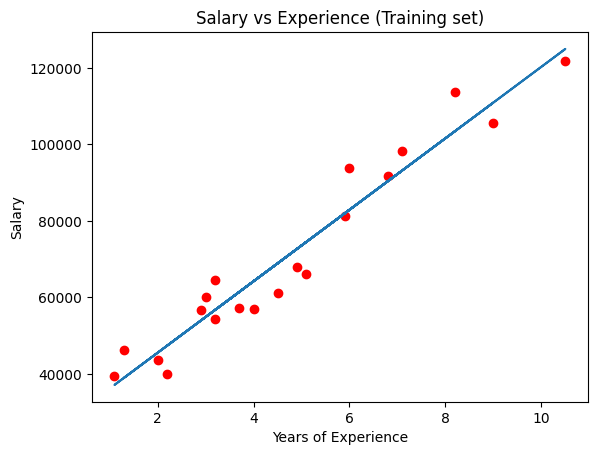

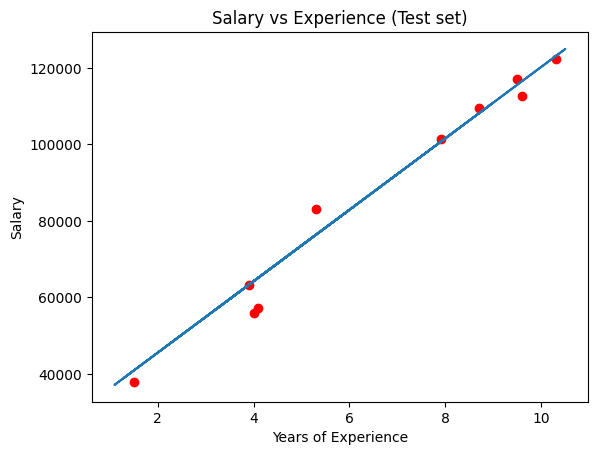

In [33]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train))
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train))
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()